# General

In [25]:
def findPivot(L,low,high):    
    """Binary search to find min value
    
    1. Check if mid in min value: if l[mid-1] > l[mid], then yes
    2. Check if mid+1 is min vaue:
    3. Divide and conquer
    
    
    EDGE CASES:
    
    
    """
    
    #Condition for pivot
    if high < low:
        return L[0]
    
    
    #Edge case
    if len(L) == 1:
        return L[0]
    
    if len(L) == 2:
        if L[0] < L[1]:
            return L[0]
        else:
            return L[1]
    
    while low <= high:
        mid = (high + low) // 2
        print(low,mid,high)

        #Check if mid is minimum
        if L[mid-1] > L[mid]:
            return L[mid]

        #Check if mid+1 is minimum
        if L[mid] > L[mid+1]:
            return L[mid +1]

        #Do binary search:
        #Check if pivot in R := (mid,high):
        if L[mid] > L[high]:
            low = mid+1
            
        #Have to add in an edge case
        #If there are duplicates, gets stuck here
        elif L[mid] == L[high]:
            high -= 1
        else:
            high = mid-1
    return L[mid]
    
    

def test():
    l = [2,4,5,6,8,0,1]
    low,high = 0,len(l)-1
    if findPivot(l,low,high) == 0:
        return 'Pass'
    else:
        return 'Fail'
    
    l = [1,1]
    low,high = 0,len(l)-1
    if findPivot(l,low,high) == 1:
        return 'Pass'
    else:
        return 'Fail'

    l = [1,3,5]
    low,high = 0,len(l)-1
    if findPivot(l,low,high) == 3:
        return 'Pass'
    else:
        return 'Fail'
    
    
l = [1,3,5]
#l = [2,4,5,6,8,0,1]
#l = [1,1]
l = [1]
l = [3,3,3,3,3,3,3,3,1,3]
findPivot(l,0,len(l)-1)

0 4 9
0 4 8
5 6 8
7 7 8


1

In [68]:
def binarySearch(L,x):
        
    #Edge cases
    if len(L) == 0:
        return -1
    if len(L) == 1:
        if L[0] == x:
            return True
        else:
            return False
        
    #Main
    low,high = 0, len(L)-1
    while low < high - 1:
        mid = (low + high) // 2
        if L[mid] == x:
            return True
        else:
            if L[mid] < x:
                low = mid+1
            else:
                high = mid-1
    return False

def test(Ls):
    x = 1
    for L in Ls:
        print(binarySearch(L,x))
        
Ls = [[1,1],[1,2,3]]
test(Ls)

False
False


# Binary search trees

In [233]:
COUNT = [10]  
def print2DUtil(root, space) : 
  
    # Base case  
    if (root == None) : 
        return
  
    # Increase distance between levels  
    space += COUNT[0] 
  
    # Process right child first  
    print2DUtil(root.right, space)  
  
    # Print current node after space  
    # count  
    print()  
    for i in range(COUNT[0], space): 
        print(end = " ")  
    print(root.val)  
  
    # Process left child  
    print2DUtil(root.left, space)  
  
# Wrapper over print2DUtil()  
def print2D(root) : 
      
    # space=[0] 
    # Pass initial space count as 0  
    print2DUtil(root, 0)  


class TreeNode:
    def __init__(self, x=None):
        self.val = x
        self.left = None
        self.right = None
        
    
def insert(root,node):
    if root is None:
        root = node
    else:
        if node.val <= root.val:
            if root.left is None:
                root.left = node
            else:
                insert(root.left,node)
        else:
            if root.right is None:
                root.right = node
            else:
                insert(root.right,node)
                
def makeBinaryTree(L):
    root = TreeNode(L[0])
    for val in L[1:]:
        insert(root,TreeNode(val))
    return root


def insertLevelOrder(L):
    """ Fill left to right """
    
    root = TreeNode(L[0])
    root = helper(L,0,root)
    return root
    
def helper(L,i,root):
    n = len(L)
    if i < n:
        if L[i] == None:
            root = None
        else:
            root = TreeNode(L[i])
            root.left = helper(L,2*i+1,root.left)
            root.right = helper(L,2*i+2,root.right)
    return root

def printInOrder(root):
    if root is None:
        pass
    else:
        print(root.val)
        printInOrder(root.left)
        printInOrder(root.right)

        
def medians(L):
    if len(L) > 1:
        median_index = len(L) // 2
        median = L[median_index]
        print(median)
        medians(L[:median_index])
        medians(L[median_index+1:])
    elif len(L) == 1:
        print(L[0])
    else:
        return
    
    
def insertList(root,L):
    if len(L) > 1:
        median_index = len(L) // 2
        median = L[median_index]
        node = TreeNode(median)
        insert(root,node)
        insertList(root, L[:median_index])
        insertList(root, L[median_index+1:])
    elif len(L) == 1:
        node = TreeNode(L[0])
        insert(root,node)
    else:
        return 
    
    
def sortedListToBST(L):
    median_index = len(L) // 2
    median = L[median_index]
    root = TreeNode(median)
    insertList(root,L[:median_index])
    insertList(root,L[median_index+1:])
    return root

L = [-10,-3,0,5,9]
root = sortedListToBST(L)
print2D(root)


          9

                    5

0

          -3

                    -10


#### Convert sorted array to binary search tree

In [141]:
def sortedArrayToBST(L):
    """
    
    PLAN:
    1. Can do via recursion
    2. First insert median, then recurse
    
    """
    
    #Terminating conditions
    if len(L) == 0:
        return None
    if len(L) == 1:
        return TreeNode(L[0])
    
    #Insert
    median_index = len(L) // 2
    median = L[median_index]
    root = TreeNode(median)
    
    #Recurse
    root.right = sortedArrayToBST(L[median_index+1:])
    root.left = sortedArrayToBST(L[:median_index])
    
    return root

L = [-10,-3,0,5,9]
root = sortedArrayToBST(L)
print2D(root)


          9

                    5

0

          -3

                    -10


#### Convert sorted linked list to binary search tree

In [137]:
class listNode:
    def __init__(self,x):
        self.val = x
        self.next = None
        
def insertToList(root,x):
    temp = root
    while temp.next:
        temp = temp.next
    temp.next = listNode(x)
    
def printList(root):
    temp = root
    while temp:
        print(temp.val)
        temp = temp.next
        
def makeList(L):
    rootList = listNode(L[0])
    for x in L[1:]:
        insertToList(rootList,x)
    return rootList

def lengthList(root):
    temp = root
    length = 0
    while temp:
        temp = temp.next
        length += 1
    return length

def findMedianNode(head):
    """ Use two pointers,
        one moving slowly,
        the other fast
        
    """
    
    fast = head
    
    #Start slow to left of head
    #That way get get the 'left' median convention
    leftHead = listNode(0)
    leftHead.next = head
    slow = leftHead
    
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    return slow.next  #slow.next is now median
        
#Prepare list
L = [-10,-3,0,5,9]
head = makeList(L)
printList(head)
findMedianNode(head).val

-10
-3
0
5
9


0

In [159]:
def insertList(head):
    
    if head is None:
        return None
    if head.next is None:
        return TreeNode(head.val)
    
    #Find median node
    fast = head
    
    #Start slow to left of head
    #That way get get the 'left' median convention
    leftHead = listNode(0)
    leftHead.next = head
    slow = leftHead
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        
    #slow.next is now median
    #insert
    root = TreeNode(slow.next.val)

    #Recurse
    root.right = insertList(slow.next.next)
    
    #Need to terminate
    slow.next = None
    root.left = insertList(head)
    
    return root

root = insertList(head)
print2D(root)


          9

                    5

0

          -3

                    -10


#### Find mode

In [3]:
from collections import defaultdict

def fill(root,cache):
    if root:
        val = root.val
        cache[val] += 1
        fill(root.left,cache)
        fill(root.right,cache)   
        
def findMode(root):
    cache = defaultdict(int)
    fill(root,cache)
    return max(cache)

findMode(root)

9

#### Find width of binary tree

In [305]:
def maxWidthBinaryTree(root):    
    
    """
    PLAN:
    1. Find nodes at given level using BFS
    2. Index nodes at given level: if node has index i, then node.left = 2*i, node.right = 2*i+1
    3. Then at each level, width = max(index) - min(index) -- node min(index) not necessarily 0
    4. Then keep track of max width seen as I strobe over levels
    """
    
    queue = [(root,0,0)]   #(node,depth,pos)
    visited = set([])
    maxWidth = currDepth = left = 0
    while queue:
        (node,depth,pos) = queue.pop(0)
        if node:
            queue.append((node.left, depth+1, pos*2))
            queue.append((node.right, depth+1, pos*2+1))

            #Once I'm finished with a given level
            #I need to update
            if currDepth != depth:
                currDepth = depth
                left = pos  #we will encoutner the leftmost node first
            maxWidth = max(pos-left+1,maxWidth)
    return maxWidth

L = [3,-10,-3,2,5,9]
root = levelOrder(L)
print2D(root)
maxWidthBinaryTree(root)


          -3

                    9

3

                    5

          -10

                    2


3

#### Validate binary search tree

In [161]:
def isValidBST(root):
    """
    
    IDEAS:
    1. Brute force: check every
    
    2. Recursive?
    
    isValidBST(root) = isValidBST(root.left) and isValidBST(root.right) and currentLevelValid
    
    PLAN:
    
    """
    
    if root is None:
        return True
    else:
        if root.left is None and root.right is None:
            return True
        
        #Root only has right leaf
        elif root.left is None:
            currentLevelValid = root.val <= root.right.val    
            return isValidBST(root.right) and currentLevelValid
        
        #Root has only left leaf
        elif root.right is None:
            currentLevelValid = root.left.val <= root.val
            return isValidBST(root.left) and currentLevelValid
        
        #Root has both leaves
        else:
            currentLevelValid = root.left.val <= root.val and root.val <= root.right.val
            return isValidBST(root.left) and isValidBST(root.right) and currentLevelValid
    
root = Node(3)
L = [3,-10,-3,2,5,9]
root = makeTree(L)
print2D(root)
isValidBST(root)


                    9

          5

3

                              2

                    -3

          -10


True

#### Minimum depth

In [237]:
def helper1(root):
    if root is None:
        return float('inf')
    elif root.left is None and root.right is None:
        return 1
    return 1 + min(helper1(root.left), helper1(root.right))

def minDepth(root):
    """
    :type root: TreeNode
    :rtype: int
    """
    if root is None:
        return 0
    return helper1(root)  

L = [3,9,20,None,None,15,17]
#L = [1,2]
L = [1,2,3,4,None,None,5]
root = insertLevelOrder(L)
print2D(root)
minDepth(root)


                    5

          3

1

          2

                    4


3

### Level order insertion

In [306]:
L = [3,9,20,None,None,15,7]
root = insertLevelOrder(L)
print2D(root)


                    7

          20

                    15

3

                    None

          9

                    None


In [307]:
def levelOrder(root):
    """ Can do this via BFS """
    
    #Edge cases
    if root is None:
        return []
    
    #Normal case
    queue = [(root,0)] #(node,level)
    currentLevel = 0
    results = []
    valsAtThisLevel = []
    while queue:
        
        #Add neighbours
        #print([(x[0].val,x[1]) for x in queue])
        node,level = queue.pop(0)
        if node:
            valsAtThisLevel.append(node.val)
            if node.left:
                queue.append((node.left,level+1))
            if node.right:
                queue.append((node.right,level+1))

            #Update level
            if currentLevel != level:
                valsAtThisLevel = valsAtThisLevel[:-1]
                currentLevel = level
                results.append(valsAtThisLevel)
                valsAtThisLevel = [node.val]
    results.append(valsAtThisLevel)
    return results
    #return [x for x in reversed(results)]


L = [3,9,20,None,None,15,7]
#L = [1]
root = insertLevelOrder(L)
print2D(root)
results = levelOrder(root)
results


                    7

          20

                    15

3

                    None

          9

                    None


[[3], [9, 20], [None, None, 15, 7]]

In [270]:
def averageOfLevels(root):
    """ Can do this via BFS """
    
    #Edge cases
    if root is None:
        return []
    
    #Normal case
    queue = [(root,0)] #(node,level)
    currentLevel = 0
    results = []
    valsAtThisLevel = []
    while queue:
        
        #Add neighbours
        #print([(x[0].val,x[1]) for x in queue])
        node,level = queue.pop(0)
        if node:
            valsAtThisLevel.append(node.val)
            if node.left:
                queue.append((node.left,level+1))
            if node.right:
                queue.append((node.right,level+1))

            #Update level
            if currentLevel != level:
                valsAtThisLevel = valsAtThisLevel[:-1]
                currentLevel = level
                results.append(valsAtThisLevel)
                valsAtThisLevel = [node.val]
    results.append(valsAtThisLevel)
    return [np.mean(x) for x in results]

### Flatten binary tree to linked list

In [342]:
L = [1,2,5,3,4,6]
root = insertLevelOrder(L)
print2D(root)


          5

                    6

1

                    4

          2

                    3


In [343]:
def flatten(root):
    """
    
    PLAN:
    1. Recursive approach. Flatten left tree, L, and right tree, R
    2. Then root.right = L, with R stitched on at the end of L
    """
    
    
    #Terminal
    if root is None:
        return
    
    #Nonterminal
    if root:
        flatten(root.left)
        flatten(root.right)
        
        #If there is a left sub-tree
        #Then attach the right sub-tree to it
        #For that I need the tail
        if root.left:
            tailOfL = root.left
            while tailOfL.right:
                tailOfL = tailOfL.right
        
            #Then attach to right subtree
            tailOfL.right = root.right

            #Then reset the tree
            root.right = root.left
            root.left = None
        
    return root


root = flatten(root)
print2D(root)


                                                  6

                                        5

                              4

                    3

          2

1


### Collect values

Not sure how to do this one recursively...

In [349]:
L = [1,2,5,3,4,6]
root = insertLevelOrder(L)
print2D(root)

def collectPreOrder(root):
    """ DFS. Can control the order of reversal by adding 
        The left or right nodes first.
    """
    
    vals = []
    queue = [root]
    while queue:
        node = queue.pop(-1)
        vals.append(node.val)
        if node:
            if node.right:
                queue.append(node.right)
            if node.left:
                queue.append(node.left)
    return vals

vals = collectPreOrder(root)
vals


          5

                    6

1

                    4

          2

                    3


[1, 2, 3, 4, 5, 6]

### Reverse linked list

In [68]:
class Node:
    def __init__(self,val=None):
        self.val = val
        self.next = None
        
def printLL(head):
    dummy = head
    while dummy:
        print(dummy.val)
        dummy = dummy.next
        

def reverse(head):
    """ 
    PLAN:
    1. Define current and next
    2. Set next.next = curr
    3. Iterate over one place
    """
    
    dummy = head
    
    prev, curr, nxt = dummy, dummy.next, dummy.next.next
    #print('prev,curr,next = {},{},{}'.format(prev.val,curr.val,nxt.val))
    prev.next = None
    while nxt:
        curr.next = prev #reverse link
        prev = curr
        curr = nxt
        nxt = nxt.next
        try:
            pass
            #print('prev,curr,next = {},{},{}'.format(prev.val,curr.val,nxt.val))
        except: ValueError
    curr.next = prev
    return curr

#Fill up
head = Node(9)
vals = [1,2,3,4,5,6,7,8][::-1]
dummy = head
for val in vals:
    dummy.next = Node(val)
    dummy = dummy.next

#reverse
head = reverse(head)

#print
printLL(head)

1
2
3
4
5
6
7
8
9


### Remove n'th node from end of linked list

In [85]:
import numpy as np
head = Node(1)
vals = [2]
dummy = head
for val in vals:
    dummy.next = Node(val)
    dummy = dummy.next
head

n = 2
slow, fast = head, head

prev = Node(0)
prev.next = head
slow,fast = prev,prev

#move fast to position n
ctr = 0
while ctr <= n:
    fast = fast.next
    ctr += 1
    
#move fast and slow until fast gets to end
#then slow is at L - n - 1 -- before val
#we want to delete
while fast:
    fast = fast.next
    slow = slow.next
print('slow,fast = {}'.format(slow.val,fast.val))

#edge case: slow = prev
if slow == prev:
    

#then delta
if slow.next.next:
    slow.next = slow.next.next
else:
    slow.next = None

AttributeError: 'NoneType' object has no attribute 'val'

### Delete duplicats from sorted linked list

In [117]:
import numpy as np

def printLL(head):
    dummy = head
    while dummy:
        print(dummy.val)
        dummy = dummy.next


def makeLL(vals):
    
    #edge case
    if not vals:
        return Node(None)
        
    head = Node(vals[0])
    dummy = head
    for val in vals[1:]:
        dummy.next = Node(val)
        dummy = dummy.next
    return head

def identical(head1,head2):
    while head1:
        if head1.val != head2.val:
            return False
        head1 = head1.next
        head2 = head2.next
    if head2 is not None:
        return False
    return True


def deleteDuplicates(head):
    
    """
    PLAN:
    1. Keep two pointers, p1 goes through the list
    2. Then other, p2, starts from p1 and moves until no more duplicates
    3. Then p1.next = p2
    """
    
    p1,p2 = head,head
    while p1 and p1.next:
        p2 = p1
        while p2 and p2.val == p1.val:
            p2 = p2.next
        p1.next = p2
        p1 = p1.next
    return head



def test():
    l1 = makeLL([1,2,2,3,3,4,5])
    ans1 = makeLL([1,2,3,4,5])
    out = deleteDuplicates(l1)
    print(identical(l1,out))
    
    l1 = makeLL([1,2])
    ans1 = makeLL([1,2])
    out = deleteDuplicates(l1)
    print(identical(l1,out))
    
    
    l1 = makeLL([1])
    ans1 = makeLL([1])
    out = deleteDuplicates(l1)
    print(identical(l1,out))
    
    l1 = makeLL([])
    ans1 = makeLL([])
    out = deleteDuplicates(l1)
    print(identical(l1,out))
    
    l1 = makeLL([1,1,1,1,1,1])
    ans1 = makeLL([1])
    out = deleteDuplicates(l1)
    print(identical(l1,out))
    
test()

True
True
True
True
True


In [296]:
def find_start(ptr):
    """ assumes ptr is BEFORE
        part of the duplicate block
    """
    
    curr, nxt = ptr, ptr.next
    while nxt:
        
        #edge case [curr,nxt]
        if nxt.next is None:
            return None
        
        #non edge case [curr,nxt,x1,x2,..]
        if nxt.val == nxt.next.val:
            return curr
        curr = nxt
        nxt = nxt.next
    return None


def find_end(start_of_block):
    """ 
    There are two cases:
    
    (i) [2,2,2,3,4,5]
    (ii) [2,2,2,3,3,4,5]
    
    The first is handled by dummy.val == dummy.next.val   (end = 3)
    The second is by dummy.next.val == dummy.next.next.val (end = 4)
    
    Edge cases?
    
    [2,2,3]
    
    
    """
    
    dummy = start_of_block
    while dummy.val == dummy.next.val or dummy.next.val == dummy.next.next.val:
        
        #edde cases, say [2,3] or [2,2]
        if dummy.next.next is None:
            if dummy.val == dummy.next.val:
                return None
            else:
                return dummy.next
            
        dummy = dummy.next
        
    #dummy is now on the last legal element
    #which is the last duplicate
    #so return the one after that
    return dummy.next


def deleteDuplicates1(head):
    
    """
    
    Same as above, except we want to remove
    ALL of the elements which have duplicates
    (along with the duplicates themselves)
    
    PLAN:
    1. Need to find start and end of duplicate block
    2. Where by start I mean node BEFORE block, and end I mean the one AFTER
    
    """
    
    prev = Node(0)
    prev.next = head
    ptr = prev
    
    #edge case: [] [1]
    if head is None or head.next is None:
        return head
    

    #edge case when start with block: [2,2,3,4,5]
    if head.val == head.next.val:
        start = prev
        end = find_end(start.next)
        head = end
        ptr = start
        
        if end is None:  #covers [1,1]
            return Node(None)
    
    while ptr:

        start = find_start(ptr)
        if start == None:
            break
            
        end = find_end(start.next)
        start.next = end
        ptr = start
    return head

        

def test():
    
    x = makeLL([1,2,2,3,3,4,5])
    ans = makeLL([1,4,5])
    out = deleteDuplicates1(x)
    print(identical(ans,out))
    
    x = makeLL([2,2,3,3,4,5])
    ans = makeLL([4,5])
    out = deleteDuplicates1(x)
    print(identical(ans,out))
    
    x = makeLL([1,2])
    ans = makeLL([1,2])
    out = deleteDuplicates1(x)
    print(identical(ans,out))
    
    
    x = makeLL([1])
    ans = makeLL([1])
    out = deleteDuplicates1(x)
    print(identical(ans,out))
    
    x = makeLL([])
    ans = makeLL([])
    out = deleteDuplicates1(x)
    print(identical(ans,out))
    
    x = makeLL([1,1,1,1])
    ans = makeLL([])
    out = deleteDuplicates1(x)
    print(identical(ans,out))
    
    
test()

True
True
True
True
True
True


### Palindromic string partitionings

Am I really sure how the yield works?

In [8]:
def partitions(s):
    if len(s) == 0:
        yield []
    else:
        for i in range(1,len(s)+1):
            start,end = s[:i], s[i:]
            for p in partitions(end):
                if isPalindrome(start):
                    yield [start] + p
                

def isPalindrome(s):
    return s == s[::-1]

s = 'aab'
list(partitions(s))

[['a', 'a', 'b'], ['aa', 'b']]

In [19]:
def partitions(s,path):
    if len(s) == 0:
        return []
    else:
        for i in range(1,len(s)+1):
            start,end = s[:i], s[i:]
            for p in partitions(end, [start] + p):
                return

In [11]:
l = [1,2,3]
l.extend([4,5])
l

[1, 2, 3, 4, 5]

In [17]:
def f(n,path):
    if n == 0:
        return 1
    else:
        return n*f(n-1,[n] + path)
    
f(3,[])

[]
[3]
[2, 3]


6

### DFS

In [88]:
def DFS(g, start, goal, explored, path):
    
    """ Returns path from v to goal in g as a string (Hack) """
    
    explored.add(start)
    print('Start = {}'.format(start))
    if start == goal:
        return path + [start]
    else:
        neighbours = set(g[start]) - explored
        for n in neighbours:
            new_start, new_path = n, path + [n]
            #print('node, goal, path = {}, {}, {}'.format(n,goal,path))
            p = DFS(g,new_start,goal,explored,path + [start])
            #print('node, goal, path = {}, {}, {}'.format(n,goal,path))
            #if p:
            #    return p
        return ''
            


g = {'A': ['B', 'C'],
    'B': ['H'],
    'C': ['D'],
    'D': ['E'],
    'E': []}


p = DFS(g,'A','B',set([]),[])
p

Start = A
Start = B
Start = C
Start = D
Start = E


''

In [94]:
def DFS(g, start, goal, explored, path):
    
    """ Returns path from v to goal in g as a string (Hack) """
    
    explored.add(start)
    neighbours = set(g[start]) - explored
    
    if start == goal:
        return path + [start]
    
    elif len(neighbours) == 0:
        return ''
    
    else:
        for n in neighbours:
            new_start, new_path = n, path + [n]
            p = DFS(g,new_start,goal,explored,path + [start])
            
            #Everything after here is at bottom of recursion tree
            #So p will either be "" or a non-empty list
            if p != '':  # '' means dead end
                return p


g = {'A': ['B', 'C'],
    'B': ['H'],
    'C': ['D'],
    'D': ['E'],
    'E': [],
    'H': []}


p = DFS(g,'A','H',set([]),[])
p

['A', 'B', 'H']

### Binary search

In [8]:
def binary_search(L,target):
    left, right = 0, len(L)-1
    while left <= right:
        mid = (right + left) // 2 
        if L[mid] == target:
            return mid
        elif L[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
        #print('L,R = {},{}'.format(left,right))
    return -1

L = [1,2,3,4,9,20]
target = 2
binary_search(L,target)

1

In [38]:
def find_peak(L):
    left, right = 0, len(L) - 1

    while left < right:
        mid = (right + left) // 2
        print('left, right, mid = {}, {}, {}'.format(left,right,mid))
        
        #Seach right interval if L[mid+1] > L
        if L[mid] > L[mid+1]: right = mid   #not mid - 1, because it is th epeak
        else: left = mid + 1
            
    print('left, right, mid = {}, {}, {}'.format(left,right,mid))            
    return left, L[left]

L = [1,2,1,3,5,6,4]
L = [1]
L = []
L = [1,2,3]
find_peak(L)

left, right, mid = 0, 2, 1
left, right, mid = 2, 2, 1


(2, 3)

In [72]:
def solve(s,wordDict):      
    if len(s) == 1:
        if s in wordDict:
            return True
        else:
            return False
    else:
        for i in range(1,len(s)):
            start, rest = s[:i], s[i:]  # s[0], s[1:end] and s[:end] and s[end:]
            test1 = start in wordDict
            test2 = solve(rest,wordDict)
            return test1 and test2
        
s = 'acat'
wordDict = ['a','cat']
solve(s,wordDict)

start,rest,test1 = a,cat,True
start,rest,test1 = c,at,False
start,rest,test1 = a,t,True


False

In [68]:
s = 'acat'
for i in range(1,len(s)):
    print('start,rest = {},{}'.format(s[:i],s[i:]))

start,rest = a,cat
start,rest = ac,at
start,rest = aca,t


In [5]:
def reverse(s):
    """
    """
    if len(s) == 1:
        return s[0]
    else:
        last, rest = s[-1], s[:-1]
        return last + reverse(rest)
    
s = 'kevin'
reverse(s)

'nivek'

In [11]:
def perms(s):
    """
    IDEAS:
    
    1. s = 'abc', perms = ['abc','acb','bac','cab','bca','cba']
       which is a at every index in perm(bc)
    
    """
    
    if len(s) == 1:
        yield s
    else:
        first, rest = s[0], s[1:]
        for perm in perms(rest):
            for i in range(len(perm)+1):
                new_perm = perm[:i] + first + perm[i:]
                yield new_perm
                
s = 'abc'
list(perms(s))

['abc', 'bac', 'bca', 'acb', 'cab', 'cba']

In [14]:
def perms(s):
    if len(s) == 1:
        if s[0] == '?':
            for num in ['0','1']:
                yield num
        else:
            yield s[0]
    else:
        first, rest = s[0], s[1:]
        for perm in perms(rest):
            if first == '?':
                for num in ['0','1']:
                    yield num + perm
            else:
                yield first + perm


s = '10?11?'
#s = '?1?'
list(perms(s))

['100110', '101110', '100111', '101111']

In [21]:
def isPalindrome(s):
    return s == s[::-1]

def partitions(s):
    """
    'ab'
    """
    if len(s) == 0:
        yield 1
    if len(s) == 1:
        yield [s]
    else:
        for i in range(1,len(s)+1):
            start, rest = s[:i], s[i:]
            if isPalindrome(start):
                for part in partitions(rest):
                    if part == 1:
                        yield [start]
                    else:
                        yield [start] + part
                
s = 'abb'
list(partitions(s))

[['a', 'b', 'b'], ['a', 'bb']]

In [26]:
def isPalindrome(s):
    if len(s) == 1:
        return True
    else:
        first, middle, last = s[0], s[1:-1], s[-1]
        return first == last and isPalindrome(middle)

s = 'cabac'
isPalindrome(s)

True

In [27]:
def sub(s,p):
    if len(p) == 0:
        return True
    else:
    for i in range(len(s)):
        if s[i] == p[0]:
            return sub(s[i+1],p[1:])
    return False

s = 'this is a test'
p = 'is'
sub(s,p)

IndexError: string index out of range

### Number of islands

In [97]:
def numIslands(grid):
    """
    
    PLAN:    
    1. Find all CC's? (only counting 1's?)
    2. Do via BFS: Time = O(V + E) ? -- depends on how you implement the graph structure
       
    ALGORITHM:
    1. Search every element and check if neighbours are all 0's --> Time: O(N^2)
    
    Time: ()
    
    """
    
    if grid == []:
        return 0
    
    m,n = len(grid), len(grid[0])
    num_ccs = 0
    for i in range(m):
        for j in range(n):
            if grid[i][j] == 1:
                start = (i,j)
                visited, grid = find_cc(grid,start)
                num_ccs += 1
    return num_ccs
        
            
def find_cc(G,start):
    queue = [start]
    visited = set([])
    while queue:
        node = queue.pop(0)
        (i,j) = node
        G[i][j] = 0
        if node not in visited:
            visited.add(node)
            neighbours = get_neighbours(G,node)
            new_neighbours = neighbours - visited
            for n in new_neighbours:
                (i,j) = n
                queue.append(n)
                G[i][j] = 0
    return visited, G
    
    
def get_neighbours(G,node):
    """ Only return neighbours that are 1 """
    
    x,y = node
    m,n = len(G), len(G[0])
    neighbours = [(x-1,y),(x+1,y),(x,y-1),(x,y+1)]
    
    #now check is position is valid and there is a one there
    neighbours = [ (x,y) for (x,y) in neighbours if 0 <= x < m and 0 <= y < n]
    neighbours = [ (x,y) for (x,y) in neighbours if grid[x][y] == 1]
    
    return set(neighbours)


grid = [[1,1,1,1,0],[1,1,0,1,0],[1,1,0,0,0],[0,0,0,0,0]]
#grid = [[1,1,0,0,0],[1,1,0,0,0],[0,0,1,0,0],[0,0,0,1,1]]
numIslands(grid)

1

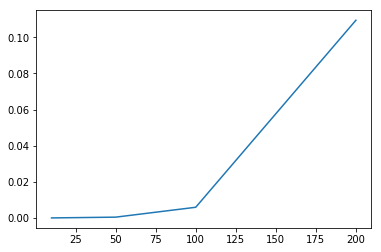

In [82]:
import time
import numpy as np
import matplotlib.pyplot as plt

ns = [10,50,100,200]
ts = []

for n in ns:
    t1 = time.time()
    grid = [[np.random.choice([0,1]) for i in range(n)] for j in range(n)]
    numIslands(grid)
    t2 = time.time()
    t = (t2-t1)/60.0
    ts.append(t)
plt.plot(ns,ts)

### Compare versions

In [67]:
import numpy as np

def compare(v1,v2):

    #First convert to tuples
    v1 = tuple([int(i) for i in v1.split('.')])
    v2 = tuple([int(i) for i in v2.split('.')])

    #Then pad
    diff = len(v1) - len(v2)
    if diff > 0:
        v2 += tuple((0 for i in range(diff)))
    elif diff < 0:
        diff = -diff
        v1 += tuple((0 for i in range(diff)))
    else:
        pass

    #Then compare
    if v1 > v2:
        return 1
    elif v1 < v2:
        return -1
    else:
        return 0

v1, v2 = '1.1.0', '2.1'
v1, v2 = '1', '1.0.0'
compare(v1,v2)

0

### Fraction to recurring decimal

In [78]:
num, denom = 1, 3

str(num / denom)

'0.3333333333333333'

In [153]:
from collections import defaultdict


def div(num,denom):

    """
    
    PLAN:
    1. Repeatedly divide: divide, multiply remainder by 10, repeat
    2. Stop when remainder is zero.
    
    EX:
    n,d = 1, 5
    
    1. div, remainder = divmod(1,5)   # div = 0, remainder = 1, ans = '0'
    2. remainder *= 10,  remainder = 10
    3. div, remainder = divmod(10,5)   # div = 2, remainder = 0, ans = '0.5'
    
    Q: how to add the '.'? Oh, if div = 0, then add '0.' to ans?
    Q: how to deal with infinite recurrence? Keep cache of seen remainders? But only add to them
       if I'm past the decimal point?
       
       divmod(21,5)  --> div, rem = 4,1, --> ans = '4'
       divmod(10,5) --> div, rem = 2,0  --> ans = '42'
       
       do I always add decimal place just once? Yes, after first, if n > d, otherwise, straightaway.

    """
    
    #edge cases
    n,d = num, denom

    if n%d == 0:
        return str(int(n/d))
    
    #negative case
    is_neg = ''
    if n*d < 0:
        is_neg = '-'
        n = np.abs(n)
        d = np.abs(d)
        
    #Case when n > d:
    if n > d:
        div, rem = divmod(n,d)
        ans = str(int(div)) + '.'
    else:
        ans = '0.'
        div,rem = divmod(n,d)
        
    cache = defaultdict(int)  #infintie series bit
    while rem != 0 and rem not in cache:
        
        cache[rem] = 1
        temp = rem*10         #move the decimal
        div, rem = divmod(temp,d)
        ans += str(int(div))
        
        print(cache)
        
    #Put in parenthesis
    # TO DO
    if rem != 0:
        
        #Find recurring bit
        index_decimal = ans.index('.')
        for i in range(len(ans[index_decimal+1:])-1):
            curr, nxt = ans[index_decimal+1+i], ans[index_decimal+1+i+1]
            if curr == nxt:
                recurring_bit = ans[index_decimal+1:]
                break
        
        ans += '(' + recurring_bit + ')'
        
    if is_neg:
        ans = is_neg + ans
    return ans
    
    
n, d = 2, 3
div(n,d)

defaultdict(<class 'int'>, {2: 1})


UnboundLocalError: local variable 'recurring_bit' referenced before assignment

### Perfect squares

In [222]:
def find_squares(n):
    S = []
    for i in range(1,n+1):
        temp = i**2
        if temp <= n:
            S.append(temp)
    return S
        

def numSquares(n):
    """
    
    IDEAS:
    1. Enumerate all perfect squares less than n. Call S(N).
    2. Then do BFS? -- like that step counting way
    3. Then do BFS on the full graph, keep track of count and path length. Earliest solution I come across
       is the answer
    
    """
    
    
    #Find S: set of perfect squares
    S = find_squares(n)
    print('S = {}'.format(S))
    
    #Do DBS
    for start in S:
        path_length = 1
        count = n - start
        queue = [(start,count,path_length, [start])]
        while queue:
            node, count, path_length, path = queue.pop(0)
            #print('node, count, path = {},{},{}'.format(node,count,path))
            for neighbour in S:
                count_temp = count - neighbour
                path_length_temp = path_length + 1
                path_temp = path + [node]
                if count > 0:
                    queue.append([neighbour,count_temp,path_length_temp, path_temp])
                elif count == 0:
                    return path_length_temp
                else:
                    pass
            print('Q = {}'.format(queue))
    return min_path_length

n = 10
numSquares(n)

S = [1, 4, 9]
Q = [[1, 8, 2, [1, 1]], [4, 5, 2, [1, 1]], [9, 0, 2, [1, 1]]]
Q = [[4, 5, 2, [1, 1]], [9, 0, 2, [1, 1]], [1, 7, 3, [1, 1, 1]], [4, 4, 3, [1, 1, 1]], [9, -1, 3, [1, 1, 1]]]
Q = [[9, 0, 2, [1, 1]], [1, 7, 3, [1, 1, 1]], [4, 4, 3, [1, 1, 1]], [9, -1, 3, [1, 1, 1]], [1, 4, 3, [1, 1, 4]], [4, 1, 3, [1, 1, 4]], [9, -4, 3, [1, 1, 4]]]


3

### Ugly number

In [302]:
def nthUglyNumber(n):
    """
    :type n: int
    :rtype: int
    
    
    BRUTE FORCE
    1. Scan over 1,...,n, compute the prime factors, if they're in 2,3,5, add
    

    BETTER:
    1. Given U(n), do I know anything about U(n+1)?
    2. Oh, I can do BFS, where nodes in each layer are 2,3,5
    3. What about the ordering? And duplcicates?
    
    L1: [2,3,5]
    L2: [2*(2,3,5), 3*(2,3,5), 5*(2,3,5)] = [4,6,10,6,9,15,10,15,25]
    
    So I need to delete duplicates, but I also need a bound. Otherwise, which layer will I stop at?
    
    min(L_n) = 2*n
    max(L_n) = 5*n
    
    so if min(L_{n+1}) > max(L_{n}) I stop
    
    PLAN:
    1. Do BFS
    2. Keep prioirty queue --> delete duplicates, and keep ordered
    3. Once you have exceeded n numbers, keep going until finished layer
    
    
    But the ordering is tricky here, so I'd want to use dynamical programming.
    
    """
    
    nums = [2,3,5]
    output = [1]
    queue = []
    
    for start in nums:
        level = 1
        path = [start]
        queue.append((start,level,path))
    
    full_cond = 1
    while queue:
        node, level, path = queue.pop(0)
        num = np.prod(path)
        print('num, level = {}, {}'.format(num,level))
        
        if num not in output:
            if len(output) < n:
                output.append(num)
                output.sort()
            else:
                if num < output[-1]:
                    output[-1] = num
                    
        if len(output) >= n:
            break

        for neighbour in nums:
            new_level = level + 1
            new_path = path + [neighbour]
            queue.append((neighbour, new_level, new_path))

    return output

n = 15
out = nthUglyNumber(n)
out

num, level = 2, 1
num, level = 3, 1
num, level = 5, 1
num, level = 4, 2
num, level = 6, 2
num, level = 10, 2
num, level = 6, 2
num, level = 9, 2
num, level = 15, 2
num, level = 10, 2
num, level = 15, 2
num, level = 25, 2
num, level = 8, 3
num, level = 12, 3
num, level = 20, 3
num, level = 12, 3
num, level = 18, 3
num, level = 30, 3


[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 18, 20, 25, 30]

In [312]:
def nthUglyNumber(n):
    """
    
    Do DP:
    
    U(n) = min(U1, U2, U3)
    
    where U2 = 2 * previous i1, 
          U3 = 3 * previous i2
          U5 = 5 * previous i3 
    
    """
    
    U = [0]*n
    U[0] = 1
    i2 = i3 = i5 = 0
    U2, U3, U5 = U[i2]*2, U[i3]*3, U[i5]*5
    for i in range(1,n):
        
        #Find min and set
        nxt = min(U2,U3,U5)
        U[i] = nxt
        
        #Iterate pointers
        if nxt == U2:
            i2 += 1
            U2 = U[i2]*2
        if nxt == U3:
            i3 += 1
            U3 = U[i3]*3
        if nxt == U5:
            i5 += 1
            U5 = U[i5]*5
    
    return U


n = 10
nthUglyNumber(n)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12]

### k-th largest element

In [350]:
def findKthLargest(nums,k):
    """
    
    IDEAS:
    1. Sort, peel off top k: O(n log n)
    2. Can I do better? Linear scan, and keep track of k largest I've seen,
    
    Scan: O(N)
    Priority Q: O(k log k)  --> is there a data structure to make this faster?
    
    --> O(N*k log(k))
        
    """
    
    queue = nums[:k]
    queue.sort()
    for n in nums[k:]:
        if n > queue[0]:
            queue[0] = n
            queue.sort()
    return queue[0]

nums = [3,2,1,5,6,4]
k = 2
findKthLargest(nums,k)

5

In [351]:
import random


def quickSelect(nums,k):
    index = np.random.choice(range(len(nums)))
    pivot = nums[index]
    
    #Partition
    left, mid, right = [], [], []
    for n in nums:
        if n > pivot:
            left.append(n)
        elif n < pivot:
            right.append(n)
        else:
            mid.append(n)
            
    #Recurse
    if k <= len(left):
        return quickSelect(left,k)
    elif k == len(left) + len(mid):
        return pivot
    else:
        return quickSelect(right,k - len(left) - len(mid))

nums, k = [3,2,1,5,6,4], 2
quickSelect(nums,k)

5

### Product of array except self

In [367]:
def productExceptSelf(nums):
    
    """
    
    BRUTE FORCE: O(N^2)
    
    BETTER:
    1. Give O[i], what do I know about O[i+1]?
    2. O[i+1] = O[i] * ( nums[i] / nums(i+1) )
    
    But not allowed division?
    
    W/O division:
    1. L[i] = product of element to left of index i
    2. R[i] = product of element to right of index i
    
    Could collapse the inner two for loops
    
    """
    
    n = len(nums)
    L = [0]*len(nums)  
    R = [0]*len(nums)
    out = [0]*len(nums)
    
    L[0] = R[n-1] = 1
    
    #Fill up l
    for i in range(1,n):
        L[i] = L[i-1]*nums[i-1]
        
    #Fill up R
    for i in range(n-2,-1,-1):
        R[i] = R[i+1]*nums[i+1]
        
    #Fill up 0
    for i in range(n):
        out[i] = L[i]*R[i]
        
    return out
    
nums = [1,2,3,4]
productExceptSelf(nums)

[24, 12, 8, 6]

### Trapping rainwater

In [421]:
def trap(height):
    """
    
    IDEAS:
    
    1. What is the water trapped at node i? w_i
    
    Let L_i = max height on [0,i-1]
        R_i = max height on [i+1, n-1]
        
    Then 
    
    w_i = 0  if hi <= Li or hi <= Ri
    w_i = min(L_i, R_i) - hi   otherwise
    
    
    PLAN
    1. Sweep once to compute Li and Ri  O(N)
    2. Sweep again to computer wi, and keep running total O(N)
    
    Time: O(N)
    Space: O(N)
    
    
    IMPROVEMENTS:
    1. Compute L and w at same time
    
    """
    
    n = len(height)
    L = [0]*n
    R = [0]*n
    
    #Compute R
    maxR = 0
    for i in range(n-2,-1,-1):
        maxR = max(height[i+1], maxR)
        R[i] = maxR
        
    #Compute L and w at same time
    maxL = 0
    total = 0  #total rainwater
    for i in range(1,n):  #w_0 = 0 always?
        
        #Find Li
        maxL = max( height[i-1], maxL)
        L[i] = maxL
        
        #Find wi
        if L[i] > height[i] and R[i] > height[i]:
            wi = min(L[i],R[i]) - height[i]
            total += wi

    return total

height = [0,1,0,2,1,0,1,3,2,1,2,1]
trap(height)

6

### Palindromes

In [428]:
def longestPalindrome(s):
    """
    
    IDEAS:
    1. Except for middle letter, have to pair up adjacent letters
    2. So add 2 for every pair encountered, and 1 otherwise
    
    
    PLAN:
    1. Scan string, if letter not in stack, add it. Else, delete parnter and add 2
    2. At end, add 1 if len(stack) > 0
    
    """
    
    L = 0
    table = {}
    
    for char in s:
        if char not in table:
            table[char] = 1
        else:
            del table[char]
            L += 2
    L += min(1, len(table))
    return L

s = "abccccdd"
longestPalindrome(s)

9

In [438]:
def countSubstrings(s):
    """
    
    BRUTE FORCE:
    1. Enuemrate all substrings -- O(N^2)
    2. Check if palindrome -- O(N)
    3. So O(N^3)
    
    Dyn Programming:
    1. Keep table M[i,j]  -- O(N^2)
    
    M[i,j] = 1  if substring s[i,..j] is palindrome
    M[i,j] = M[i+1,j-1] and s[i] == s[j]
    
    Ex:   s[i,j] = 'abba'   ('abba' is palindrome if 'bb' is and 'a' = 'a')
        
    Boundary Conditions:
    1. M[i,i] = 1  'single letters'
    2. M[i,i+1] =  bool s[i] == s[j]   'aa' or 'ba'
    
    General?
    M[i,j] = M[i+1, j-1] -- but how to iterate?
    
    So I have to iterate over the diagonals. 
    
    """
    
    n = len(s)
    M = [[False for i in range(n)] for i in range(n)]
    
    #Palindromes length 1
    for i in range(n):
        M[i][i] = True
        
    #Palindromes length 2
    for i in range(n-1):
        M[i][i+1] = s[i] == s[i+1]
        
    #General: iterate along the diagonals, starting at the third
    i, j = 0, 2
    while i < n - 2 and j < n:
        
        M[i][j] = M[i+1][j-1] and s[i] == s[j]
    
        i += 1
        j += 1
    
    return M

s = 'aba'
countSubstrings(s)

[[True, False, True], [False, True, False], [False, False, True]]

### Zig-zag order traversal

In [121]:
class Node:
    def __init__(self,val=None):
        self.val = val
        self.left = None
        self.right = None


def search(root,val):
    """ Binary search """

    #Terminal condition
    if root is None:
        return False

    #Recurse
    if root.val == val:
        return True
    elif val < root.val:
        return search(root.left,val)
    else:
        return search(root.right,val)
    
    
def insert(root,val):
    
    if root is None:
        root = Node(val)
    else:
        if val <= root.val:
            if root.left is None:
                root.left = Node(val)
            else:
                insert(root.left,val)
        else:
            if root.right is None:
                root.right = Node(val)
            else:
                insert(root.right, val)
                
def find_min(root):
    if root.left is None:
        return root.val
    else:
        return find_min(root.left)
    
def printInOrder(root):
    if not root:
        pass
    else:
        print(root.val)
        printInOrder(root.left)
        printInOrder(root.right)
                    
root = Node(5)
vals = range(4,11,1)
for val in vals:
    insert(root,val)
printInOrder(root)

5
4
5
6
7
8
9
10


In [122]:
root = Node(10)
vals = [5,15,3,7,12,17]
for val in vals:
    insert(root,val)
printInOrder(root)

10
5
3
7
15
12
17


In [123]:
def get_neighbours(root):
    temp = []
    if root.left: temp.append(root.left)
    if root.right: temp.append(root.right)
    return temp


def level_order(root):
    """ Do BFS """
    
    sol = []
    queue = [(root,0)]  #(root,level)
    curr_level = 0
    temp_sol = []  #collect nodes at same level
    while queue:
        
        node, level = queue.pop(0)
        
        #add neighbours
        for neighbour in get_neighbours(node):
            queue.append([neighbour,level+1])
        
        #If same level append
        if level == curr_level:
            temp_sol.append(node.val)
        
        #If not, do reset
        else:
            curr_level = level
            sol.append(temp_sol)
            temp_sol = [node.val]
            
    sol.append(temp_sol)
    return sol


def zig_zag(root):
    
    sol = []
    queue = [(root,0)]  #(root,level)
    curr_level = 0
    temp_sol = []  #collect nodes at same level
    while queue:
        
        node, level = queue.pop(0)
        
        #add neighbours
        for neighbour in get_neighbours(node):
            queue.append([neighbour,level+1])
        
        #If same level append
        if level == curr_level:
            if level % 2 == 0:
                temp_sol.append(node.val)
            else:
                temp_sol = [node.val] + temp_sol
        
        #If not, do reset
        else:
            curr_level = level
            sol.append(temp_sol)
            temp_sol = [node.val]
            
    sol.append(temp_sol)
    return sol    

zig_zag(root)

[[10], [15, 5], [3, 7, 12, 17]]

### Add 2 numbers in linked list

In [164]:
class Node:
    def __init__(self, val = None):
        self.val = val
        self.next = None
        
class linkedList:
    def __init__(self):
        self.head = None
        
    def insertAtEnd(self,node):
        """
        This is O(N)
        """
        
        #edge cases
        if not self.head:
            self.head = node
        elif self.head.next is None:
            self.head.next = node

        #regular case
        else:
            temp = self.head
            while temp.next:
                temp = temp.next
            temp.next = node
            
            
    def insertNode(self,node):
        """ Insert node at start: O(1) """
        
        temp = self.head
        self.head = node
        self.head.next = temp

        
    def printNodes(self):
        temp = self.head
        while temp:
            print(temp.val)
            temp = temp.next
            
    def insertVals(self,vals):
        for val in vals:
            self.insertNode(Node(val))
            
    def search(self,val):
        temp = self.head
        if temp.val == val:
            return True
        while temp:
            if temp.val == val:
                return True
            temp = temp.next
        return False
    
    def delete(self,val):
        
        #First find successor
        temp = self.head
        if temp.val == val:
            self.head = temp.next
            return 
            
        while temp:
            if temp.next.val == val:
                break
            temp = temp.next
        
        #Now temp is successor
        restOfList = temp.next.next
        temp.next = restOfList
        
            
l = linkedList()
l.insertVals([1,2,3,4])
l.search(3)
l.delete(3)
l.printNodes()

4
2
1


In [175]:
class ListNode:
    def __init__(self, val = None):
        self.val = val
        self.next = None

def add2List(root1,root2):
    """
    
    BRUTE FORCE:
    1. Make new list
    2. Go to end of both lists, add vals, find remainder + X, put X at end of new list
    3. Repeat, adding in remainder
    
    Time: O(N^2 + M^2) --> have to go to end of list every time?
    Space: O(N), where N > M
    
    Improve: dont need new list, copy into longer of two lists. O(N) to find out each
             Space --> O(1)
            
    BETTER: beat O(N^2)
    1. Merge two lists? O(N log N)?
    
    2. Multiple linear scans?
       a. Create two stacks of values in l1 and l2
       b. Pop from end of both, add, keep track of remainder
       c. Insert into new l3  (insert at head) --> O(1)
       d. Repeat
    
    Time: O(N + M)
    Space: O(N + M)
    
    """
    
    #Make stacks
    stack1, stack2 = [], []
    temp1, temp2 = root1, root2
    
    #edge cases
    if not root1: return root2
    if not root2: return root1
    
    #Fill up
    while temp1:
        stack1.append(temp1.val)
        temp1 = temp1.next
    while temp2:
        stack2.append(temp2.val)
        temp2 = temp2.next
        
    
    #Fill into new list
    root3 = ListNode(-1)
    temp = root3
    carry = 0
    while stack1 or stack2:
        x = stack1.pop(-1) if stack1 else 0
        y = stack2.pop(-1) if stack2 else 0
        z, carry = (x+y+carry) % 10, (x+y+carry) // 10
        new_node = ListNode(z)
        new_node.next = root3.next
        root3.next = new_node
    if carry != 0:
        new_node = ListNode(carry)
        new_node.next = root3.next
        root3.next = new_node
    return root3.next

l1, l2 = linkedList(), linkedList()
l1.insertVals([5])
l2.insertVals([5])
r1, r2 = l1.head, l2.head 
r3 = add2List(r1,r2)

temp = r3
while temp:
    print('val = {}'.format(temp.val))
    temp = temp.next

val = 1
val = 0


### Merge two soreted arrays

In [185]:
nums1 = [1,2,3]
nums2 = [2,5,6]

n, m = len(nums1), len(nums2)
nums = [0]*(n+m)

i,j,k = 0,0,0
while i < n and j < m:
    if nums1[i] <= nums2[j]:
        nums[k] = nums1[i]
        i += 1
        k += 1
    else:
        nums[k] = nums2[j]
        j += 1
        k += 1

#fill up non empty bits
while i < n:
    nums[k] = nums1[i]
    i += 1
    k += 1

while j < m:
    nums[k] = nums2[j]
    j += 1
    k += 1

nums

[1, 2, 2, 3, 5, 6]

### Roughwork

Time: O(n log n)
Space: O(n)

Good for linked lists

In [407]:
#Compute L
n = len(height)
height = [0,1,0,2,1,0,1,3,2,1,2,1]
L = [0]*n
maxL = 0
for i in range(1,n-1):
    if height[i-1] > maxL:
        maxL = height[i-1]
    L[i] = maxL
L

[0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 0]

In [410]:
#Compute R
height = [0,1,0,2,1,0,1,3,2,1,2,1]
R = [0]*n
maxR = 0
for i in range(n-2,-1,-1):
    if height[i+1] > maxR:
        maxR = height[i+1]
    R[i] = maxR
R

[3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 0]

### Smallest substring matching given arr

In [43]:
def func(arr,sub):
    """
    Ex: 
    
    Given: arr = ['x','y','z'], sub = 'xyyzyyzyx'
    Ans: 'zyx'
    
    SOLN:
    1. Enumerate all substrings with sliding window --> O(N), N = len(sub)
    2. Check if current substring is valid. Keep hash?
    
    freq[x] = counts of c
    
    During iteration, add to freq. Then check if coun
    
    
    CHECK:
    
    sub = 'x y y z y y z y x'
             l
                           r 
    
    freq = {'x':1, 'y':4, 'z':2 }
    solution = 'zyx' < 'zyyx'
    
    Time: O(N + M), M = initialize the hash
    
    
    """
    
    #edge case
    if len(arr) == 0 or len(sub) == 0:
        return ''
    
    #make hash
    freq = {i:0 for i in arr}
    
    #main
    right, n, sol = 0, len(sub), ''
    for left in range(len(sub)):
        
        #subtract left from hash after first step
        if left != 0:
            char = sub[left-1]  #substract previous letter
            if char in freq: freq[char] -= 1
        
        #move right until found valid solution
        while not isValid(freq) and right < n:
            
            #add to hash
            char = sub[right]
            if char in freq: freq[char] += 1  #only add letters I care about
                
            #iterate
            right += 1
            
        #now potentially have solution (potential because I might not have moved right)
        curr = sub[left:right]
        if isValid(freq):
            
            #first soln sound
            if sol == '':
                sol = curr
            else:
                sol = min(sol, curr, key = len)
                
    return sol


def isValid(freq):
    """
    if freq = {x:>1, y>:1, z>=1}
    """
    
    return np.prod([ val>=1 for val in freq.values()])


sub, arr = 'xyyzyyzyx', ['x','y','z']
func(arr,sub)

'zyx'

### Word break

In [39]:
def func(s,wordDict):
    """
    
    D[i] = 1 if s[:i+1] is solvable
    D[i+j] = D[i] and s[i:j] in wordDict
    
    So do for loop over i and j
    
    IMPROVEMENT:
    1. Terminate j loop early if D[i] is False
    
    """
    
    #Set up
    n = len(s)
    D = [False]*(n+1)  #make len n+1, to start off base vase
    D[0] = True 
    
    #Main
    for i in range(n):     #dont have to consider last element, j-loop will catch that
        if D[i] == True:
            for j in range(i,n):
                word = s[i:j+1]   #first, s[0:1] = s[0], last = s[0:n+1] = all of s
                if word in wordDict:
                    D[j+1] = True        
    return D[-1]
    
s = 'leetcode'
wordDict = ['leet','code']
func(s,wordDict)

True

### Duplicate elements

In [139]:
def binarySearch(nums):
    """
    
    PLAN: Binary search
    
    1. Let C(n/2) be number of element <= n/2 
    2. If C(n/2) > n/2, then duplicate in [1,n/2]  <--> [left, mid]
       Else, duplicate in [1 + n/2, n]             <--> [mid+1, right]
       
    3. Terminate when left == right, so while left < right
    
    
    Ex:
    nums = [4,2,1,2,3,5]  (use this to find C)
    
    range = [1,2,3,4,5]  (do binary search over this)
             l       
               r
             m
               
    1. mid = n / 2 = 2
    2. C(n/2 = 2) = 3
    3. C(n/2) > n/2, so duplicate in [1,2] --> correct --> right = n/2
    
    4. mid = 1
    5. C(n/2 = 1) = 1
    6. (n/2) <= n/2, so duplicate in [mid+1,right] = [2,2]
    7. Then terminate on [2,2]
    
    Looks good!
    
    """
    
    left, right = 1, len(nums)-1 
    while left < right:
        
        print('right, left = {}, {}'.format(left,right))
        mid = (right+left) // 2
        
        #Find count
        count = 0
        for k in nums: 
            if k <= mid: count += 1
        
        #Do binary search
        if count > mid: right = mid
        else: left = mid + 1
            
    #right and left same here, so return either
    return right  
    
nums = [4,2,1,2,5]
f(nums)

right, left = 1, 4
right, left = 1, 2


2

### Largest rectangle in histogram

In [198]:
import numpy as np

def largestRectangleArea(heights):
    """


    BRUTE FORCE:
    1. Enumerate all rectangles, find area, keep track of max area

    max_area = 0
    for i in range(n):
        for j in range(i,n):
            base = (j - i + 1)        
            min_height = min(heights[i:j+1])
            area = base*height
            max_area = max(area,max_area)

    Ex: [2,1,5,6,2,3]
         l         r    
           m         

    1. base = 1
    2. heights = [0:1] = 2  --> min = 2
    3. area = 2

    4. base = 1-0+1 = 2
    5. heights = [0:2] = [2,1] --> min = 1
    6. area = 2

    Enumerate = O(N^2)
    Min height = O(N)

    TIME: O(N^3), SPACE: O(1)


    IDEAS FOR BETTER:

    Enumeration --> sliding window?
    1. When to move left? To min height seen so far?
    2. area([3,2,1,5,4])  = min + len

    Two things happen
    (i) you dont find another min --> area increases
    (ii) you do find another min  --> area decreases

    We want max... so stop after (ii)?

    Ex: [2,1,5,6,2,3]
             l      
               r
              m

       A = (r - l + 1)*1 = (5-0+1) = 6
       A (5-2)*(3)

    1. Start l = 0, r = n-1
    2. Sweep one, find min
    3. Move left until hit min,  (dA < 0 for sure) l
    4. Find min on [l,r], record A
    5. Move r until hit in min
    6. Repeat

    Improve:
    Can I calculate min_seen on the fly?

    TIME: O(N)  SPACE: O(1)


    """

    #edge cases, nums = 0 or nums = 1? (CHECK THIS)
    if not heights:
        return 0
    
    if len(heights) == 1:
        return heights[0]

    #Find global minh
    i_min = np.argmin(heights)
    h_min = heights[i_min]
            
    #non-edge
    n = len(heights)
    left, right, maxA = 0, n - 1, h_min*n
    while left <= right:   #when right = left we count single columns

        print('1: left, right, i_min, A = {}, {}, {}, {}'.format(left,right,i_min,maxA))
        #Move left until hit 'new' min, now left if one step ahead of i_min
        while left <= i_min and left < n:
            left += 1
            
        print('2: left, right, i_min, A = {}, {}, {}, {}'.format(left,right,i_min,maxA))
        
        if left >= n:
            break

        #Find new min on [l,r] 1
        i_min = left
        h_min = heights[left]
        for i in range(left,right+1):
            if heights[i] < h_min:
                i_min, h_min = i, heights[i]

        print('3: left, right, i_min, A = {}, {}, {}, {}'.format(left,right,i_min,maxA))

                
        #Calculate area * record max
        base = right - left + 1
        h_min = heights[i_min]
        area = base*h_min
        maxA = max(area, maxA)
        
        print('4: left, right, i_min, A = {}, {}, {}, {}'.format(left,right,i_min,maxA))

        
        #Break condition
        if left > right: break
        
        
        #Move right until one behind i_min
        while right >= i_min and right >= 0:
            right -= 1
            
        #Find new min on [l,r] 2
        i_min = left
        h_min = heights[left]
        for i in range(left,right+1):
            if heights[i] < h_min:
                i_min, h_min = i, heights[i]

        #Calculate area * record max
        base = right - left + 1
        h_min = heights[i_min]
        area = base*h_min
        maxA = max(area, maxA)
        
        #Break condition
        if right < left: break

    return maxA

#heights = [2,1,5,6,2,3]
heights = [1,2,3]
largestRectangleArea(heights)

1: left, right, i_min, A = 0, 2, 0, 3
2: left, right, i_min, A = 1, 2, 0, 3
3: left, right, i_min, A = 1, 2, 1, 3
4: left, right, i_min, A = 1, 2, 1, 4


4

### Longest palindromic substring

To be fixed!

In [85]:
def func(s):
    """
    
    Ex:
    s = 'babad
    
    valid sols = single letters, 'aba', 'bab', 'baba'
    sol = 'aba'
    
    BRUTE FORCE:
    1. Enumerate all substrings --> O(N^2)
    2. Check palindrome --> O(N)
    3. Time: O(N^3), Space: O(1)
    
    BETTER: DP
    1. Idea: 'dabad' is a palidrome if 'aba' is, and first letter = last letter
              what about 'abb', 'abba'?
    
    2. Let P(i,j) = 1 if string s_i, ..., s_j is palindrome
       Then P(i,j) = P(i+1,j-1) and s[i] == s[j]
       
    3. Tricky part: the iteration is over the diagonal? s_ij determined by elements to lower-left
    
    4. Boundary conditions?
       
       P(i,0) = s_i, 0 = Ill-defined. So I stay in upper right hand quadrant
       P(0,j) = P(1,j-1) -- general case
       P(i,i) = s_i = True
       
    
    Ex: s = 'aba'
    
    P = 1, 0, 1
        0, 1, 0
        0, 0, 1
        
    1. Fill in diagonals
    2. Move along first diagonal:
    
      (i) P(0,1) = P(1,0) and s[0] == s[1]
              =  0 and 'a' == 'b'
              = 0 
              
      (ii) P(1,2) = P(2,1) and s[1] == s[2]
                  = 0 and 'b' == 'a'
                  = 0
                  
    3. Second diagonal:
    
        (i) P(0,2) = P(1,1) and s[0] == s[2]
                   = 1 and 'a' == 'a'
                   = 1

      And we want P[0,2] = True
      
      
    4. No! We want the (k,l), P(k,l) = 1 and (l-k+1) = smallest
    
    5. Time = O(N^2), Space = O(N^2) 
    
    """
    
    #Set up
    n = len(s)
    P = [[False for i in range(n)] for j in range(n)]
    
    
    #Boundary conditions: substrings len 1
    maxL, sol = 1, s[0]
    for i in range(n):
        P[i][i] = True
        
    #Boundary conditions: substrings len 2
    for i in range(n-1):
        P[i][i+1] = s[i] == s[i+1]
        if P[i][i+1]:
            maxL = 2
            sol = s[i:i+2]
                        
    #Main -- iterate over 3rd diagonl,
    for pivot in range(2,n):
        i, j = 0, pivot
                
        #walk along the diagonal
        while i + 1  < n and j < n:
            
            #Main rule
            P[i][j] = P[i+1][j-1] and s[i] == s[j] 
            
            #Check if longest palindrome
            if P[i][j] == True and (j-i+1) > maxL:
                sol = s[i:j+1]
                maxL = (j-1+1)
                
            #Iterate
            i += 1
            j += 1
            
            
    return sol, P

s = "babaddtattarrattatddetartrateedredividerb"
sol,P = func(s)
sol

'tattarrattat'

### If possible to jump

In [39]:
def func(nums):
    """
    Ex = [3,2,1,0,3,2,1,4]
                  i 
                        j
                      
    Let j = right_most
    If you can at least jump to the rightmost, then you're safe
    
    Ex: this is a contraction of the dynamic programming case,
        which is O(N^2).
    
    """

    n = len(nums)
    right_most = n-1  #index of right-most 'safe' position
    for i in range(n-2,-1,-1):
        
        #if you're -- index i -- maximum jump exceeds right_most
        #then i is the new right_most
        max_jump = i + nums[i]
        if right_most <= max_jump:
            right_most = i
    return right_most == 0    #need the last element to be safe

nums = [3,2,1,0,4]
func(nums)

False

### Four sum

In [6]:
def f(nums, target):
    
    nums.sort()

    n = len(nums)
    sols = []
    for i in range(n-3):        
        for j in range(i+1,n-2):
            conjugate_sum = target - nums[i] - nums[j]

            #Now do list sort
            low, high = j+1, n-1
            while low < high:
                temp_sum = nums[low] + nums[high]
                if temp_sum > conjugate_sum:
                    high -= 1
                elif temp_sum < conjugate_sum:
                    low += 1
                else: #solution!
                    sols.append([nums[i], nums[j], nums[low], nums[high]])
                    low += 1
                    while low < high and nums[low] == nums[low-1]:
                        low += 1
    return sols

nums, target = [1, 0, -1, 0, -2, 2], 0
f(nums,target)

[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]

### Roughwork

In [60]:
import pandas as pd

fname = '/home/khev/research/OpenNMT-py/data/gigaword/train/train.title.txt'
with open(fname,'rb') as f:
    titles = f.readlines()
    
fname = '/home/khev/research/OpenNMT-py/data/gigaword/train/train.article.txt'
with open(fname,'rb') as f:
    abstract = f.readlines()

In [61]:
titles[:5]

[b'australian current account deficit narrows sharply\n',
 b'at least two dead in southern philippines blast\n',
 b'australian stocks close down #.# percent\n',
 b'envoy urges north korea to restart nuclear disablement\n',
 b'skorea announces tax cuts to stimulate economy\n']

In [64]:
abstract[1]

b'at least two people were killed in a suspected bomb attack on a passenger bus in the strife-torn southern philippines on monday , the military said .\n'

In [5]:
def f(s,wordDict):

    #Terminal means one char
    if len(s) == 1:
        return s in wordDict

    else:
        #First check whole word
        if s in wordDict:
            return True

        #Then do split and recurse
        for i in range(1,len(s)-1):
            word1, word2 = s[:i], s[i:]  #First = 'm', 'acat', Last = 'maca', 't'
            print('w1, w2 = {}, {}'.format(word1,word2))
            if word1 in wordDict:
                return f(word2,wordDict)
        return False
        
        
s = 'goalspecial'
wordDict = ["go","goal","goals","special"]
f(s,wordDict)

w1, w2 = g, oalspecial
w1, w2 = go, alspecial
w1, w2 = a, lspecial
w1, w2 = al, special
w1, w2 = als, pecial
w1, w2 = alsp, ecial
w1, w2 = alspe, cial
w1, w2 = alspec, ial
w1, w2 = alspeci, al


False

### Heaps

In [43]:
from heapq import heappush, heappop

nums = [10,6,4,3,14,2]
heap = []
print('Filling up heap')
for n in nums:
    heappush(heap,n)
    print('heap = {}'.format(heap))
    
#Popping heap
print('\nEmptying heap')
while heap:
    print('val = {}'.format(heappop(heap)))
    print('heap = {}'.format(heap))

Filling up heap
heap = [10]
heap = [6, 10]
heap = [4, 10, 6]
heap = [3, 4, 6, 10]
heap = [3, 4, 6, 10, 14]
heap = [2, 4, 3, 10, 14, 6]

Emptying heap
val = 2
heap = [3, 4, 6, 10, 14]
val = 3
heap = [4, 10, 6, 14]
val = 4
heap = [6, 10, 14]
val = 6
heap = [10, 14]
val = 10
heap = [14]
val = 14
heap = []


### Spiral matrix

In [1]:
def spiralMatrix(matrix):
    """
    
    IDEAS:
    1. Peel off
    """
    
    
    results = []
    while matrix and matrix[0]:
        
        #Go right
        if matrix[0]:
            for i in matrix.pop(0):
                results.append(i)
            
        #Go down
        if matrix and matrix[0]:
            for row in matrix:
                results.append(row.pop(-1))
        
        #Go left
        if matrix and matrix[0]:
            for i in reversed(matrix.pop(-1)):
                results.append(i)
        
        #Go up
        if matrix and matrix[0]:
            for row in reversed(matrix):
                results.append(row.pop(0))
                
    return results


M = [
 [ 1, 2, 3 ],
 [ 4, 5, 6 ],
 [ 7, 8, 9 ]
]

spiralMatrix(M)

[1, 2, 3, 6, 9, 8, 7, 4, 5]

In [8]:
def generateMatrix(n):
    """
    Fill in 
    """
    
    res = [[0 for i in range(n)] for i in range(n)]
    left, right, top, bottom, num = 0, n-1, 0, n-1, 1
    while left <= right and top <= bottom:
        
        #go right
        for i in range(left, right+1):
            res[top][i] = num
            num += 1
        top += 1
        
        #go down
        for i in range(top, bottom + 1):
            res[i][right] = num
            num += 1
        right -= 1
        
        #go left
        for i in range(right,left-1,-1):
            res[bottom][i] = num
            num += 1
        bottom -= 1
        
        #go up
        for i in range(bottom,top-1,-1):
            res[i][left]=  num
            num += 1
        left += 1
        
    return res


n = 3
res = generateMatrix(n)
res

[[1, 2, 3], [8, 9, 4], [7, 6, 5]]

### LRU cache

In [24]:
class LRUcache:
    """
    
    IDEAS:
    - Like a dictionary. Recall if implemented as a hash, then insert = search = O(1)
    - But have to keep a marker at each value
    - When reach capacity, find element with lowest marker, and replace
    
    Search = O(1)
    Insert = Find minimium --> O(k)  
    
    So how do I speed up the find minimum? Priority queue? Heap?
    
    """
    
    def __init__(self, capacity):
        self.capacity = capacity
        self.array = OrderedDict()
        
    def get(self,key):
        """ O(1) """
        
        if key in self.array:
            val = self.array[key]
            del self.array[key]
            self.array[key] = val
            return val
        else:
            return -1
        
    def put(self,key,val):
        """ O(1) """
        
        if len(self.array) < self.capacity:
            if key in self.array:
                del self.array[key]  #delete key before refreshing it
            self.array[key] = val
        else:
            key_min, val_min = self.array.popitem(last=False)
            self.array[key] = val
            
            
l = LRUcache(2)
l.put(1,1)
l.put(2,2)
l.get(1)
l.array

OrderedDict([(2, 2), (1, 1)])